# Custom Packet Test

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/test_custom_packet.csv",usecols=[1,2],header=None) #Don't need packet #
data = data[data[1].str.contains("energy")] #Don't need non-energy rows
data = data[data[2] != 0] #0's are unplugged channels.

data_i50 = pd.read_csv("data/test_custom_packet_I50.csv",header=None,usecols=[1,2]) #Don't need packet #
data_i50 = data_i50[data_i50[1].str.contains("energy")] #Don't need non-energy rows
data_i50 = data_i50[data_i50[2] != 0] #0's are unplugged channels.

data_b230 = pd.read_csv("data/test_custom_packet_baseline230.csv")#,usecols=["word label","value"])
data_b230 = data_b230[data_b230[" word label"].str.contains("energy")]
data_b230 = data_b230[data_b230[" value"] != 0]

data_b0 = pd.read_csv("data/test_custom_packet_baseline0.csv")
data_b0 = data_b0[data_b0["word label"].str.contains("energy")]
data_b0 = data_b0[data_b0["value"] != 0]

data_def = pd.read_csv("data/test_custom_packet_defaults.csv")
data_b0 = data_b0[data_b0["word label"].str.contains("energy")]
data_b0 = data_b0[data_b0["value"] != 0]

data_no = pd.read_csv("data/test_custom_packet_b230_nosource.csv",usecols=["word label","value"])
data_no = data_no[data_no["word label"].str.contains("energy")]
data_no = data_no[data_no["value"] != 0]

Note: all 0's recorded were explicitly discarded as they represent channels that are not plugged in in the firmware diagram.

In [3]:
np.mean(data[data[1].str.contains("8")][2]) - np.mean(data_b230[data_b230[" word label"].str.contains("8")][" value"])

55794.39793550811

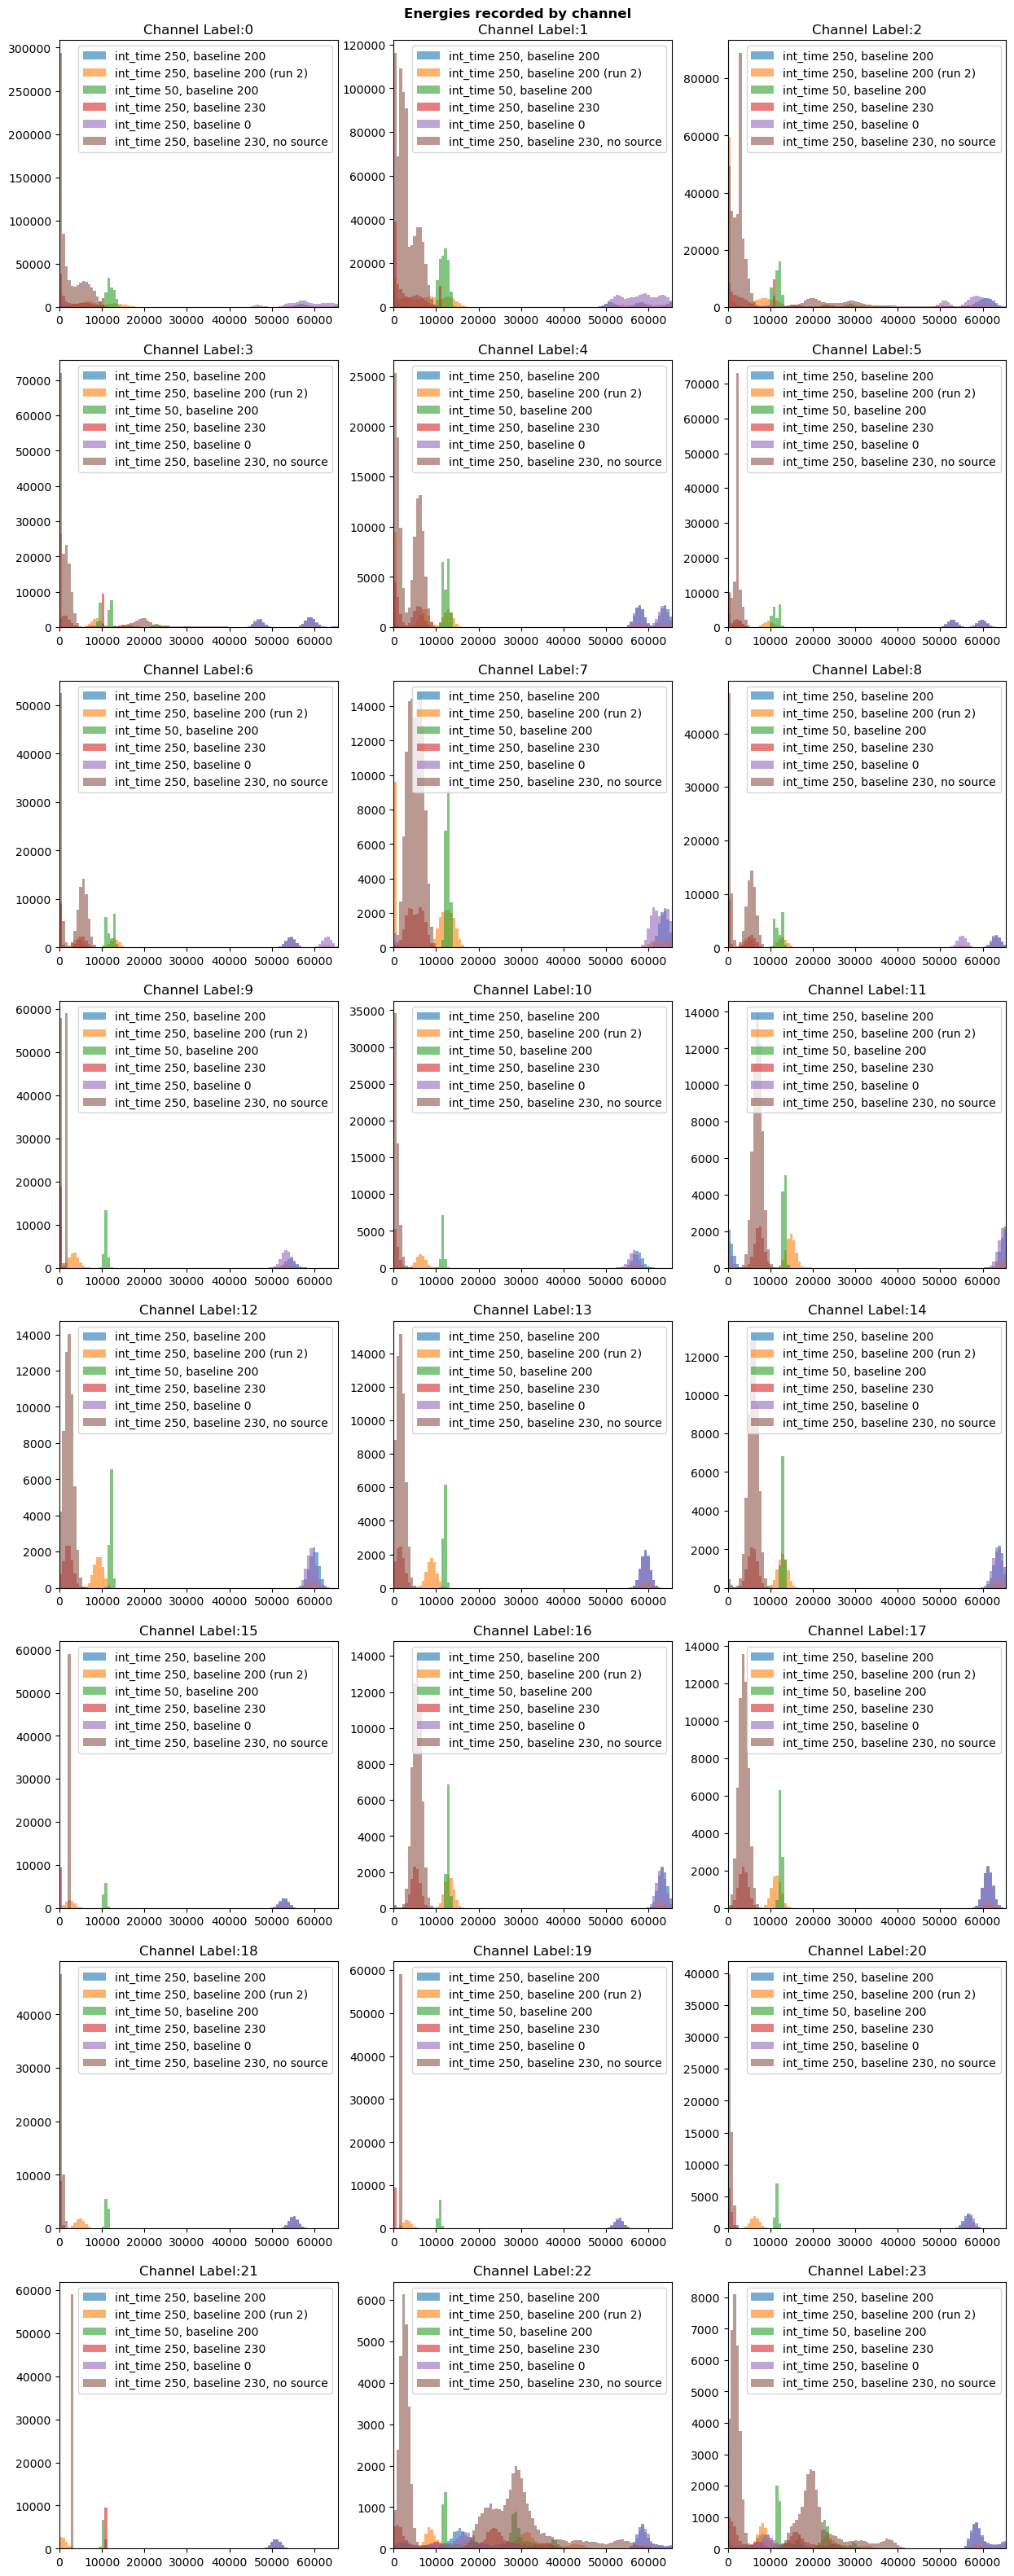

In [4]:
fig, ax = plt.subplots(nrows=math.ceil((27-4)/3),ncols=3,figsize=(15,5*math.ceil((27-4)/3)))

bins = np.linspace(0,65536,100)

for i in range(27-4+1):
    row = math.floor(i/3)
    current_ax = ax[row][i%3]
    current_ax.set_title('Channel Label:'+str(i))
    current_ax.hist(data[data[1].str.contains(str(i+4))][2],alpha=0.6,bins=bins,label="int_time 250, baseline 200")
    current_ax.hist(data_def[data_def["word label"].str.contains(str(i))]["value"],alpha=0.6,bins=bins,label="int_time 250, baseline 200 (run 2)")
    current_ax.hist(data_i50[data_i50[1].str.contains(str(i))][2],alpha=0.6,bins=bins,label="int_time 50, baseline 200")
    current_ax.hist(data_b230[data_b230[" word label"].str.contains(str(i))][" value"],alpha=0.6,bins=bins,label="int_time 250, baseline 230")
    current_ax.hist(data_b0[data_b0["word label"].str.contains(str(i))]["value"],alpha=0.6,bins=bins,label="int_time 250, baseline 0")
    current_ax.hist(data_no[data_no["word label"].str.contains(str(i))]["value"],alpha=0.6,bins=bins,label="int_time 250, baseline 230, no source")
    current_ax.legend()
    current_ax.set_xlim(min(bins),max(bins))

plt.suptitle('Energies recorded by channel',weight='bold',y=0.89)
plt.show()

Text(0.5, 0.98, 'Energies recorded, baseline 230, int_time 250')

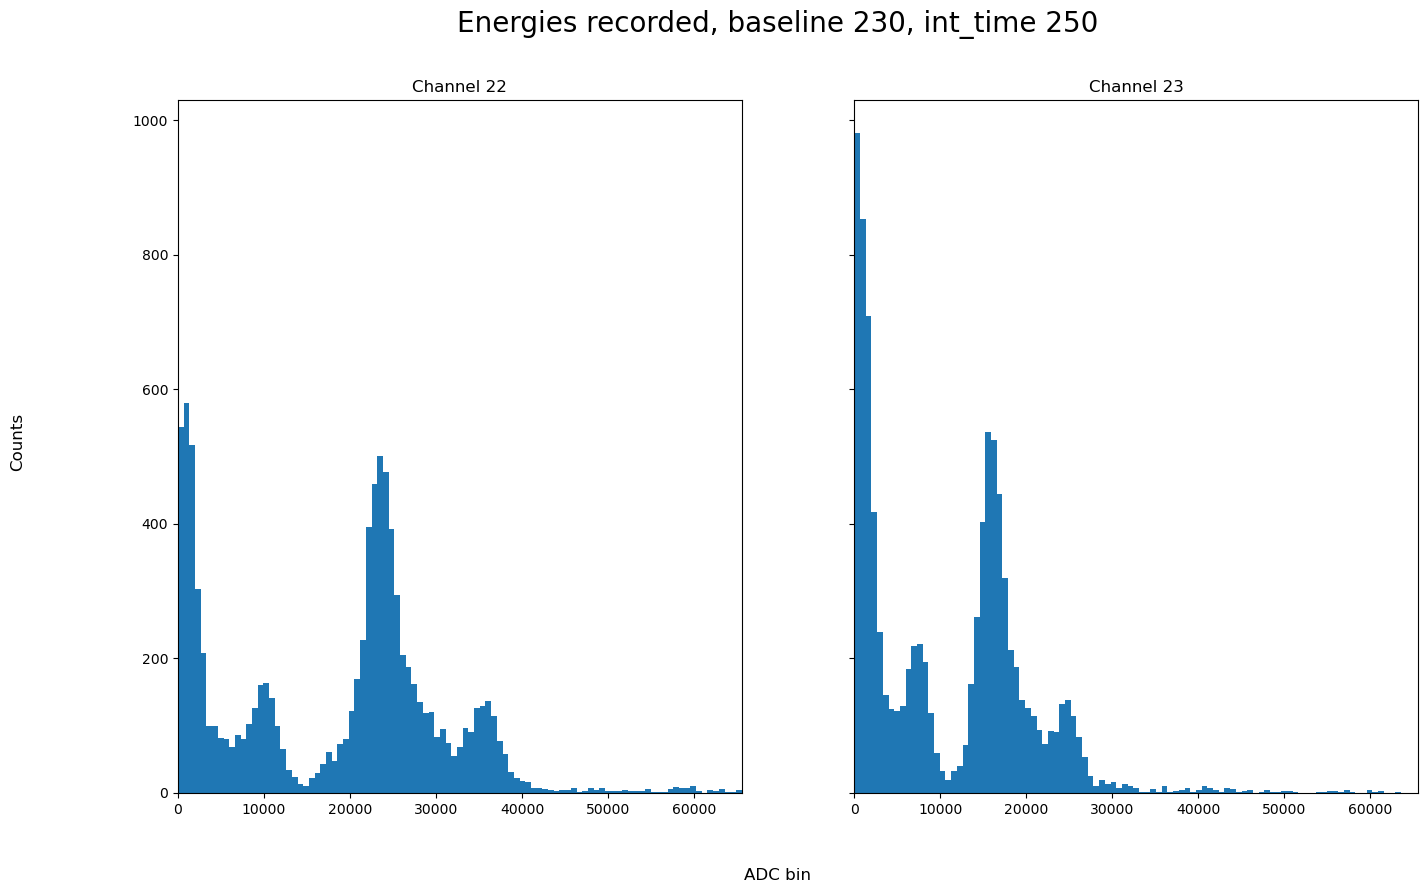

In [5]:
fig, ax = plt.subplots(1,2,sharey=True,figsize=(16,9))

ax[0].hist(data_b230[data_b230[" word label"].str.contains("22")][" value"],bins=bins)
ax[1].hist(data_b230[data_b230[" word label"].str.contains("23")][" value"],bins=bins)
ax[0].set_title("Channel 22"); ax[1].set_title("Channel 23")

ax[0].set_xlim(min(bins),max(bins))
ax[1].set_xlim(min(bins),max(bins))

fig.supxlabel("ADC bin")
fig.supylabel("Counts")
plt.suptitle("Energies recorded, baseline 230, int_time 250",size=20)

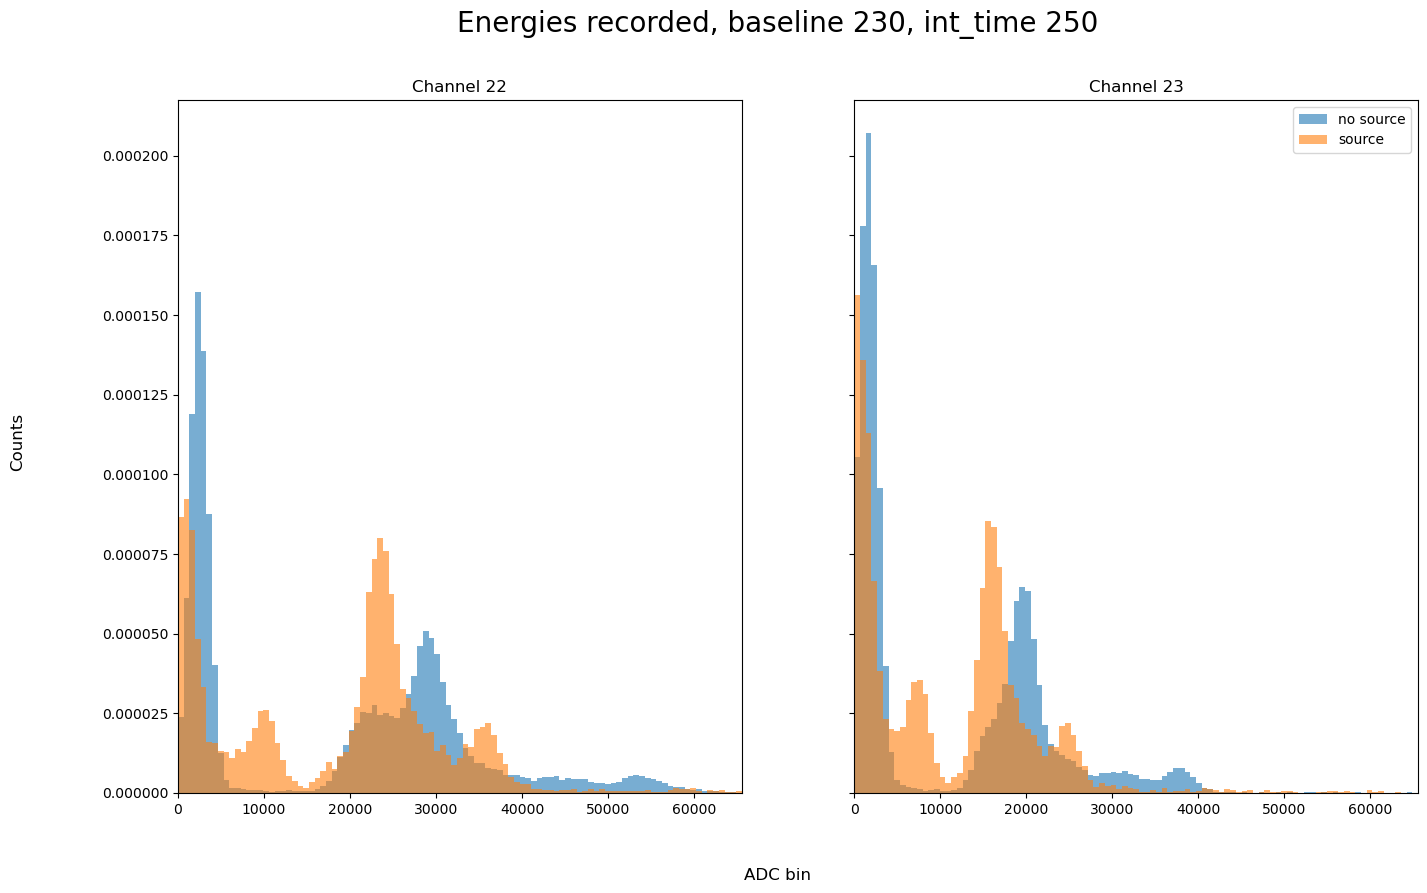

In [7]:
fig, ax = plt.subplots(1,2,sharey=True,figsize=(16,9))

ax[0].hist(data_no[data_no["word label"].str.contains("22")]["value"],bins=bins,alpha=0.6,label="no source",density=True)
ax[0].hist(data_b230[data_b230[" word label"].str.contains("22")][" value"],bins=bins,alpha=0.6,label="source",density=True)
ax[1].hist(data_no[data_no["word label"].str.contains("23")]["value"],bins=bins,alpha=0.6,label="no source",density=True)
ax[1].hist(data_b230[data_b230[" word label"].str.contains("23")][" value"],bins=bins,alpha=0.6,label="source",density=True)
ax[0].set_title("Channel 22"); ax[1].set_title("Channel 23")

ax[0].set_xlim(min(bins),max(bins))
ax[1].set_xlim(min(bins),max(bins))

fig.supxlabel("ADC bin")
fig.supylabel("Counts")
plt.legend()
plt.suptitle("Energies recorded, baseline 230, int_time 250",size=20)
plt.show()